[*********************100%***********************]  1 of 1 completed


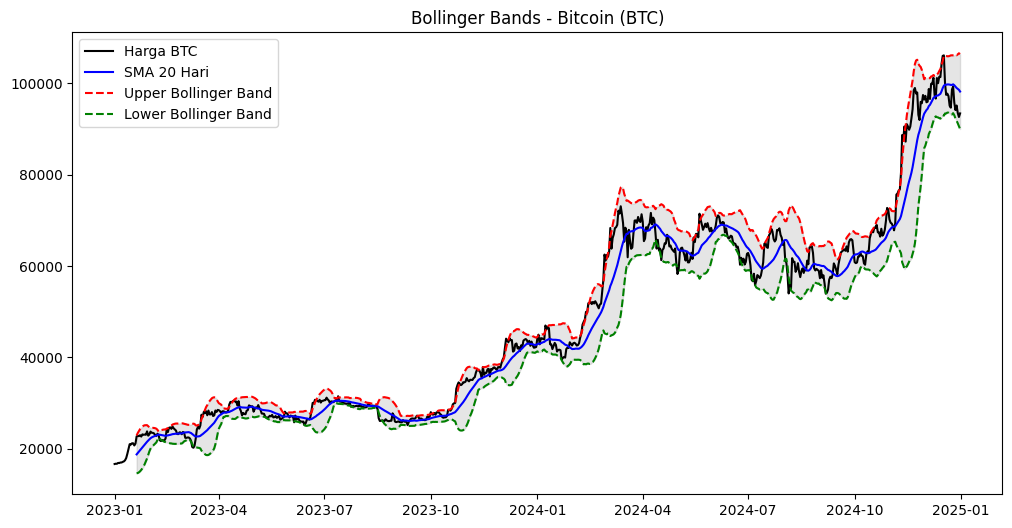

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ambil data harga Bitcoin (BTC) dari Yahoo Finance
btc = yf.download('BTC-USD', start='2023-01-01', end='2025-01-01')

# Hitung rata-rata bergerak 20 hari (Simple Moving Average)
btc['SMA20'] = btc['Close'].rolling(window=20).mean()

# Hitung deviasi standar 20 hari
btc['STD20'] = btc['Close'].rolling(window=20).std()

# Hitung Bollinger Bands
btc['UpperBand'] = btc['SMA20'] + (btc['STD20'] * 2)
btc['LowerBand'] = btc['SMA20'] - (btc['STD20'] * 2)

# Visualisasikan harga dan Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label='Harga BTC', color='black')
plt.plot(btc['SMA20'], label='SMA 20 Hari', color='blue')
plt.plot(btc['UpperBand'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(btc['LowerBand'], label='Lower Bollinger Band', color='green', linestyle='--')

# Menambahkan area antara Lower dan Upper Band dengan warna abu-abu transparan
plt.fill_between(btc.index, btc['LowerBand'], btc['UpperBand'], color='gray', alpha=0.2)

# Tambahkan judul dan legenda
plt.title('Bollinger Bands - Bitcoin (BTC)')
plt.legend(loc='best')

# Menampilkan grafik
plt.show()


[*********************100%***********************]  1 of 1 completed


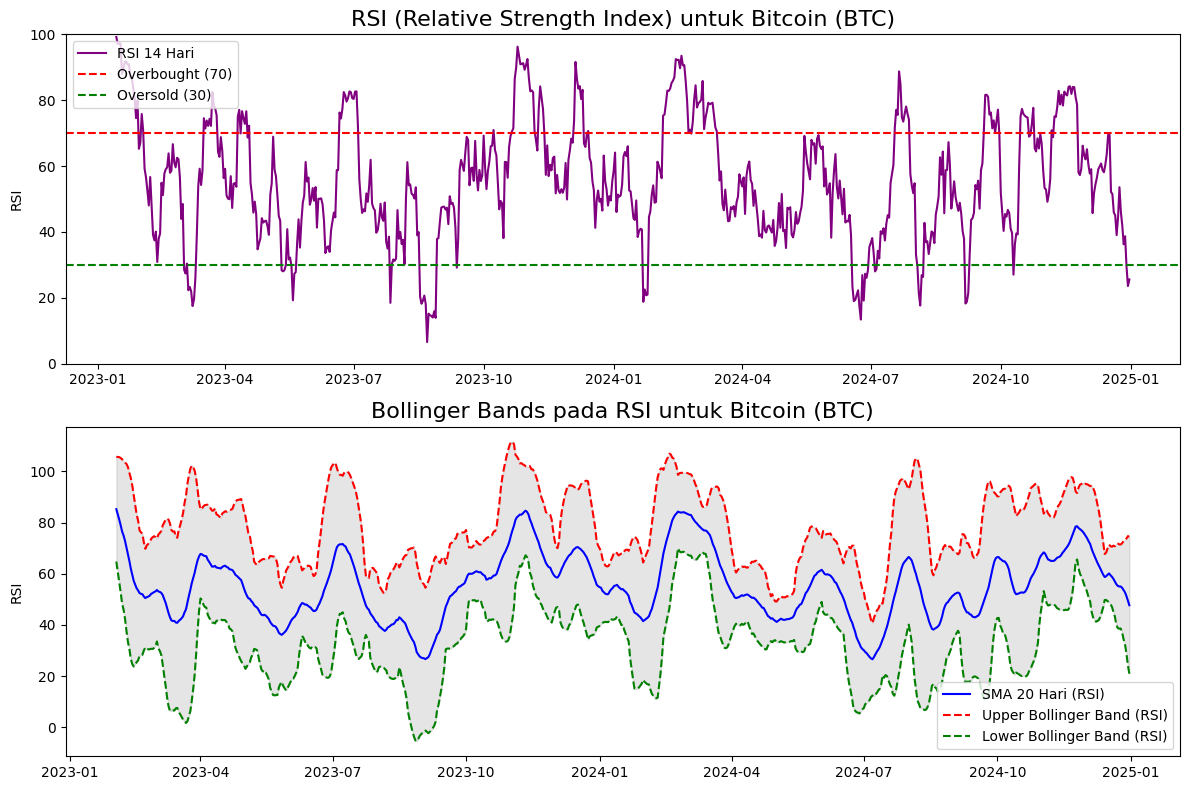

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ambil data harga Bitcoin (BTC) dari Yahoo Finance dengan interval harian
crypto = yf.download('BTC-USD', start='2023-01-01', end='2025-01-01', interval='1d')

# Fungsi untuk menghitung RSI (Relative Strength Index) dengan periode 14
def calculate_rsi(data, window=14):
    delta = data.diff()  # Menghitung perubahan harga
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()  # Menghitung kenaikan
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()  # Menghitung penurunan
    rs = gain / loss  # Rasio kenaikan terhadap penurunan
    rsi = 100 - (100 / (1 + rs))  # Rumus RSI
    return rsi

# Hitung RSI untuk harga Bitcoin
crypto['RSI'] = calculate_rsi(crypto['Close'], window=14)

# Hitung rata-rata bergerak 20 hari (SMA) dan deviasi standar (STD) untuk Bollinger Bands pada RSI
crypto['SMA_RSI'] = crypto['RSI'].rolling(window=20).mean()
crypto['STD_RSI'] = crypto['RSI'].rolling(window=20).std()

# Hitung Bollinger Bands pada RSI
crypto['UpperBand_RSI'] = crypto['SMA_RSI'] + (crypto['STD_RSI'] * 2)
crypto['LowerBand_RSI'] = crypto['SMA_RSI'] - (crypto['STD_RSI'] * 2)

# Buat grafik Bollinger Bands pada RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Grafik pertama: RSI
ax1.plot(crypto['RSI'], label='RSI 14 Hari', color='purple')
ax1.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
ax1.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
ax1.set_ylim(0, 100)
ax1.set_title('RSI (Relative Strength Index) untuk Bitcoin (BTC)', fontsize=16)
ax1.set_ylabel('RSI')
ax1.legend(loc='upper left')

# Grafik kedua: Bollinger Bands pada RSI
ax2.plot(crypto['SMA_RSI'], label='SMA 20 Hari (RSI)', color='blue')
ax2.plot(crypto['UpperBand_RSI'], label='Upper Bollinger Band (RSI)', color='red', linestyle='--')
ax2.plot(crypto['LowerBand_RSI'], label='Lower Bollinger Band (RSI)', color='green', linestyle='--')
ax2.fill_between(crypto.index, crypto['LowerBand_RSI'], crypto['UpperBand_RSI'], color='gray', alpha=0.2)

ax2.set_title('Bollinger Bands pada RSI untuk Bitcoin (BTC)', fontsize=16)
ax2.set_ylabel('RSI')
ax2.legend(loc='best')

# Menampilkan grafik
plt.tight_layout()
plt.show()
